In [105]:
%config Completer.use_jedi = False


In [2]:
import os
import pickle
import src.utils as utils
import numpy as np
import matplotlib.pyplot as plt

In [96]:
for key in load.keys():
    print(key)

Spread:mi-ss,Size:5000-20000,pi:0.3,init_inf:1
Spread:mi-ss,Size:5000-20000,pi:0.3,init_inf:200
Spread:mi-ss,Size:5000-20000,pi:0.1,init_inf:1
Spread:mi-ss,Size:5000-20000,pi:0.1,init_inf:200
Spread:mi-ss,Size:5000-20000,pi:0.03,init_inf:1
Spread:mi-ss,Size:5000-20000,pi:0.03,init_inf:200
Spread:mi-ss,Size:5000-20000,pi:0.01,init_inf:1
Spread:mi-ss,Size:5000-20000,pi:0.01,init_inf:200


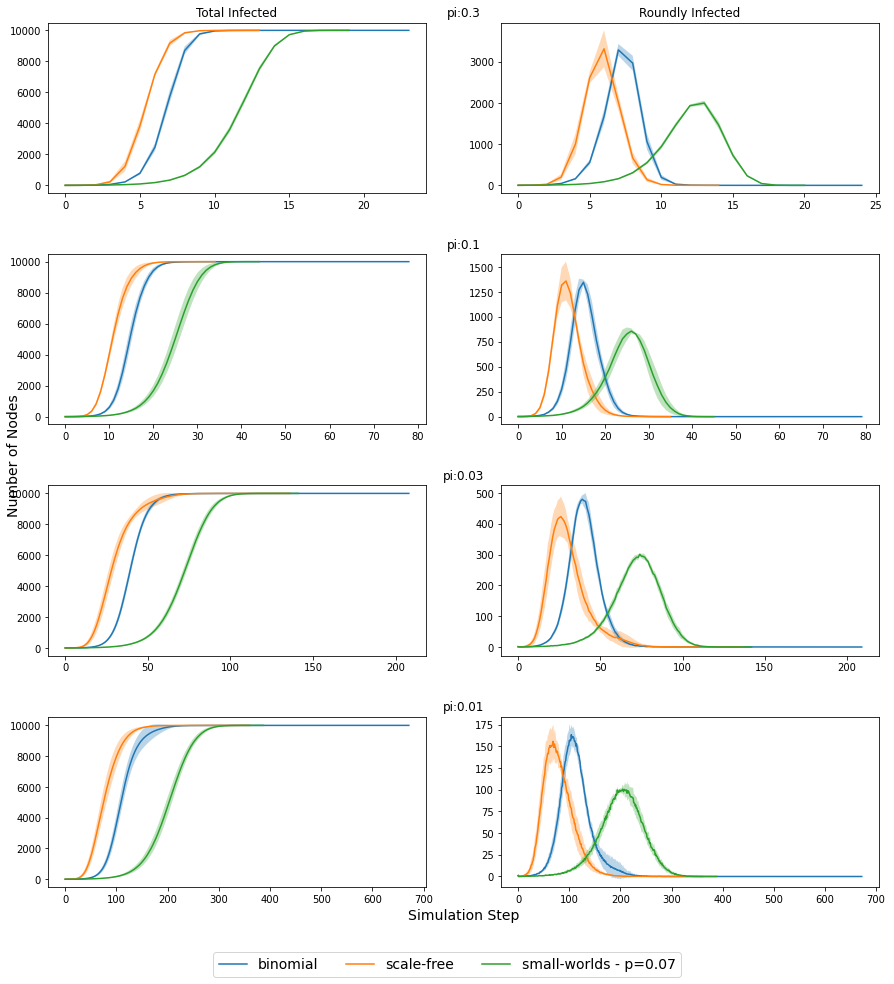

In [163]:
load = utils.load_obj("obj", "results_ms_10000,50000")
labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(4,2, figsize=(14,14))
k=-1
for key in load.keys():
    if "init_inf:1" in key:
        k += 1
        for i in range(1,3):
            for tplg in range(3):
                res_arr = [np.mean(utils.padded_stack(graph[i]),axis=0) for graph in load[key][tplg]]
                mean = np.mean(utils.padded_stack(res_arr), axis=0)
                std =  np.std(utils.padded_stack(res_arr), axis=0)
                axs[k][i-1].plot(mean, label = labels[tplg])    
                axs[k][i-1].fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.3)  

        fig.add_subplot(int(f"41{k+1}"), frameon=False)    
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.title(key.split(",")[2])

fig.legend(labels, loc='lower center', ncol=4, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected")

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected")


fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)




plt.xlabel("Simulation Step", size=14)
plt.ylabel("Number of Nodes",  size=14)
plt.tight_layout()

# plt.savefig("img/pg1-pis-compare_ss_5k.pdf", format="pdf")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")

# Bar Graph

In [173]:
l = load['Spread:mi-ms,Size:20000-100000,pi:0.3,init_inf:1']

In [177]:
[len(ll) for ll in l[0]]

[3, 3, 3, 3, 3]

Text(0.5, 0.98, 'Distribution of Simulation Lengths')

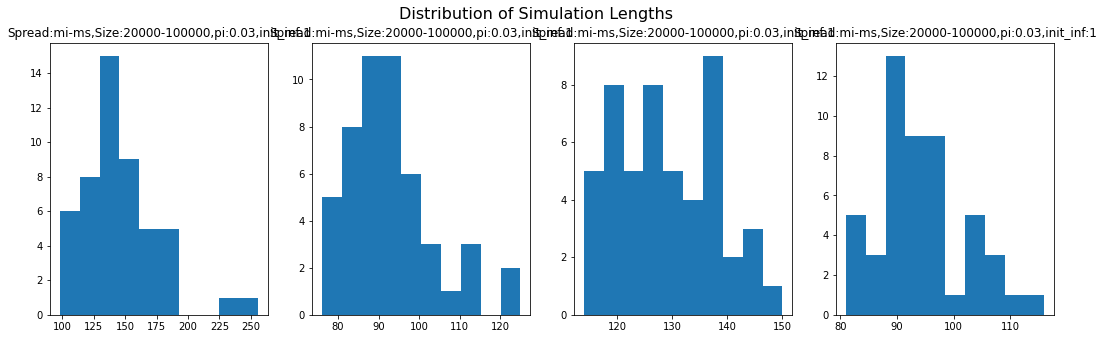

In [189]:
plt.figure(figsize=(18,5))
for keyn in range(4):
    ax = plt.subplot(1, 4, keyn+1)
    res = np.array([[len(run) for run in grun[1]] for grun in load[key][keyn]]).flatten()
    ax.hist(res)      
    ax.set_title(key)
plt.suptitle("Distribution of Simulation Lengths", size=16)

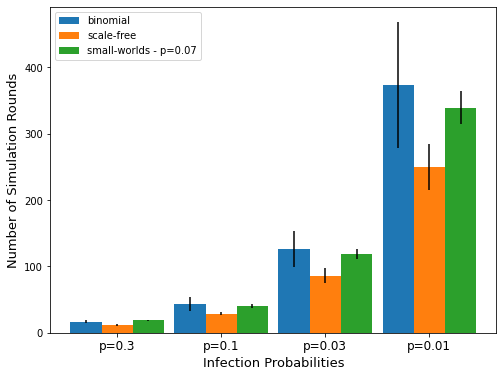

In [203]:
load = utils.load_obj("obj", "results_ms_10000,50000")
labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(1,1, figsize=(8,6))

for tplg in range(3):
    k=-1
    this_tplg_means = []
    this_tplg_stds = []
    for key in load.keys():
        if "init_inf:1" in key:
            k += 1
            res_arr = np.array([[len(run) for run in grun[1]] for grun in load[key][tplg]]).flatten()
            this_tplg_means.append(np.mean(res_arr))
            this_tplg_stds.append(np.std(res_arr))
    ind = np.arange(k+1)
    axs.bar(ind + 0.3*tplg, this_tplg_means, yerr=this_tplg_stds, label=labels[tplg], width=0.3)      
#     fig.add_subplot(int(f"41{k+1}"), frameon=False)    
#     plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     plt.title(key.split(",")[2])
axs.legend(loc="upper left")
axs.set_xticks(ind + 0.3)
axs.set_xticklabels(["p=0.3","p=0.1","p=0.03","p=0.01"], size=12)
axs.set_xlabel("Infection Probabilities",size=13)
axs.set_ylabel("Number of Simulation Rounds",size=13)
# plt.savefig("img/pg1-pis-compare_ms_10k_bar.pdf", format="pdf")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")

# Sizes

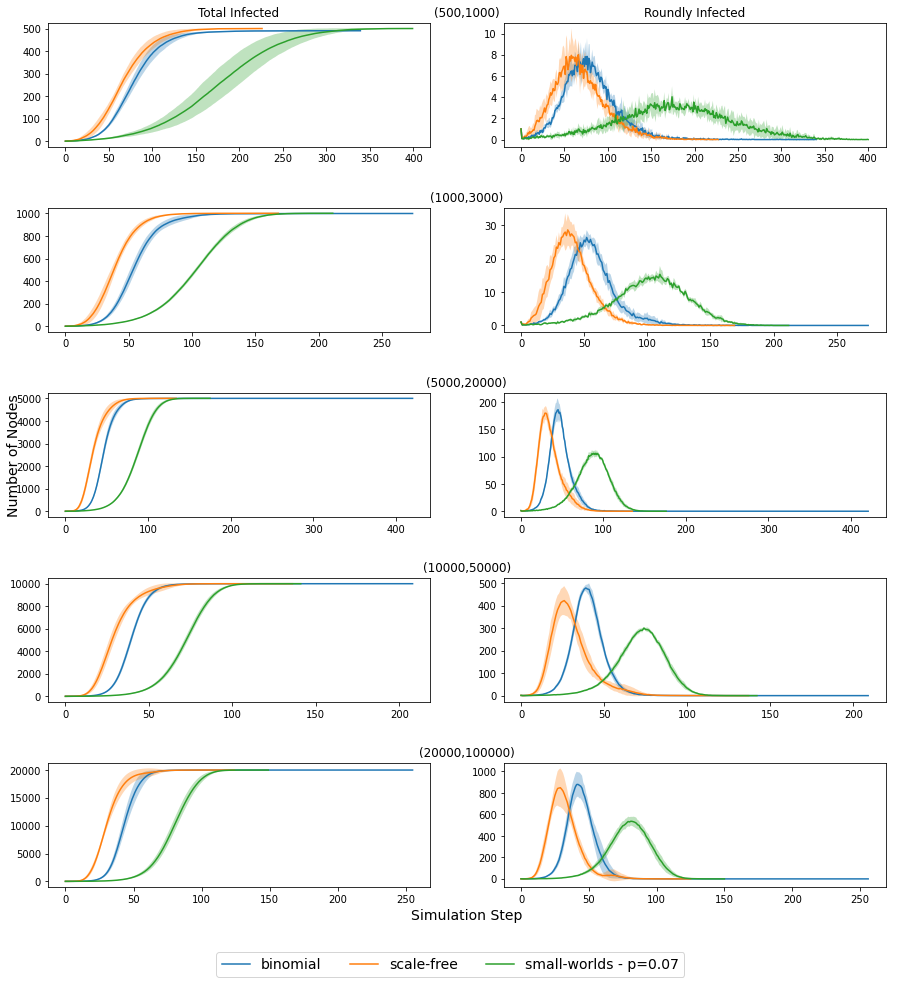

In [170]:
graph_sizes = ["(500,1000)", "(1000,3000)", "(5000,20000)", "(10000,50000)", "(20000,100000)"]
labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(len(graph_sizes), 2, figsize=(14,14))

for k,size in enumerate(graph_sizes):
    m,n = size[1:-1].split(",")
    load = utils.load_obj("obj", f"results_ms_{m},{n}")
    key = f'Spread:mi-ms,Size:{m}-{n},pi:0.03,init_inf:1'
    for i in range(1,3):
        for tplg in range(3):
            res_arr = [np.mean(utils.padded_stack(graph[i]),axis=0) for graph in load[key][tplg]]
            mean = np.mean(utils.padded_stack(res_arr), axis=0)
            std =  np.std(utils.padded_stack(res_arr), axis=0)
            axs[k][i-1].plot(mean, label = labels[tplg])    
            axs[k][i-1].fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.3)  
    fig.add_subplot(int(f"{len(graph_sizes)}1{k+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title(graph_sizes[k])
    

fig.legend(labels, loc='lower center', ncol=4, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected")

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected")


fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)



plt.xlabel("Simulation Step", size=14)
plt.ylabel("Number of Nodes",  size=14)
plt.tight_layout()

# plt.savefig("img/pg1-sizes-compare_ms_p003.pdf", format="pdf")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")

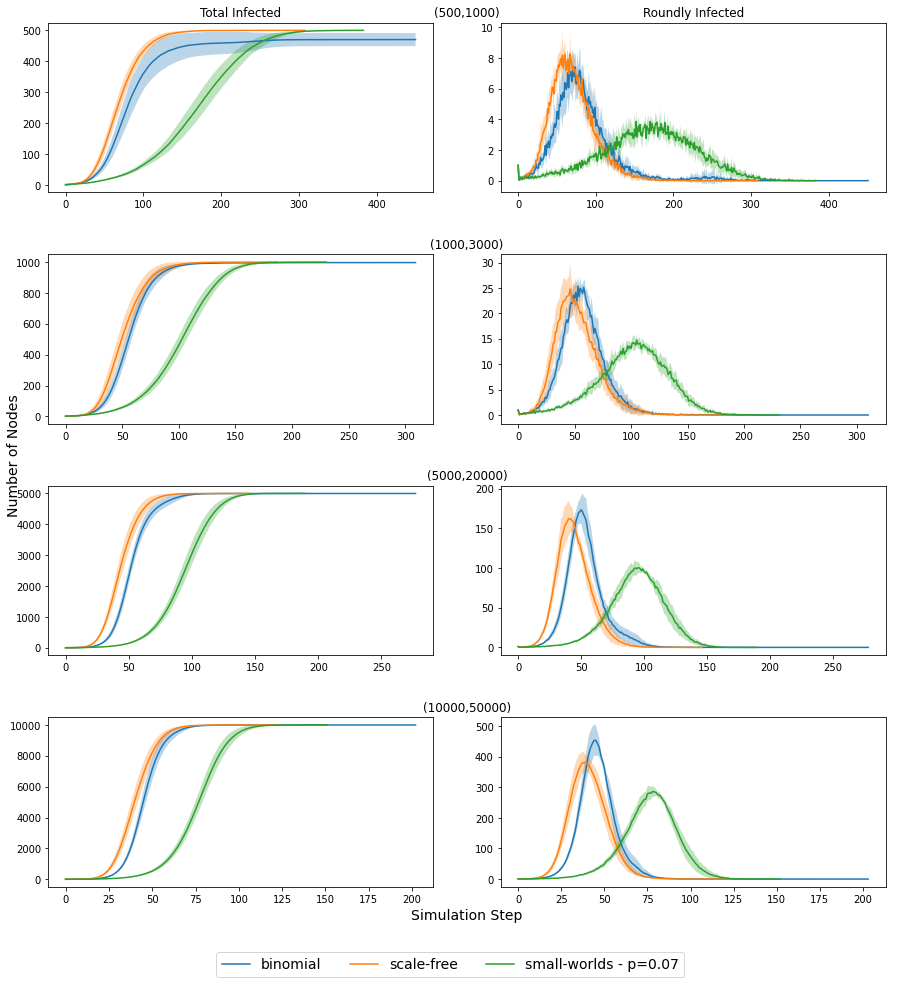

In [206]:
graph_sizes = ["(500,1000)", "(1000,3000)", "(5000,20000)", "(10000,50000)", "(20000,100000)"]
labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(len(graph_sizes), 2, figsize=(14,14))

for k,size in enumerate(graph_sizes):
    m,n = size[1:-1].split(",")
    load = utils.load_obj("obj", f"results_ss_{m},{n}")
    key = f'Spread:mi-ss,Size:{m}-{n},pi:0.03,init_inf:1'
    for i in range(1,3):
        for tplg in range(3):
            res_arr = [np.mean(utils.padded_stack(graph[i]),axis=0) for graph in load[key][tplg]]
            mean = np.mean(utils.padded_stack(res_arr), axis=0)
            std =  np.std(utils.padded_stack(res_arr), axis=0)
            axs[k][i-1].plot(mean, label = labels[tplg])    
            axs[k][i-1].fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.3)  
    fig.add_subplot(int(f"{len(graph_sizes)}1{k+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title(graph_sizes[k])
    

fig.legend(labels, loc='lower center', ncol=4, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected")

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected")


fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)



plt.xlabel("Simulation Step", size=14)
plt.ylabel("Number of Nodes",  size=14)
plt.tight_layout()

# plt.savefig("img/pg1-sizes-compare_ms_p003.pdf", format="pdf")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")

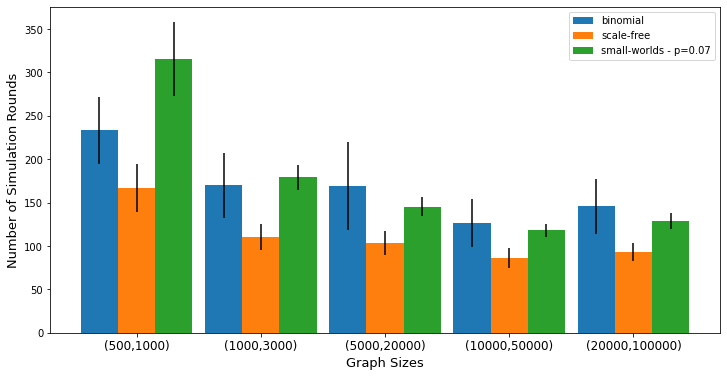

In [217]:
# load = utils.load_obj("obj", "results_ms_10000,50000")
# labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]

graph_sizes = ["(500,1000)", "(1000,3000)", "(5000,20000)", "(10000,50000)", "(20000,100000)"]
labels = ["binomial", "scale-free", "small-worlds - p=0.07"]#, "small-worlds - p=0.35"]
fig, axs = plt.subplots(1,1, figsize=(12,6))



for tplg in range(3):
    k=-1
    this_tplg_means = []
    this_tplg_stds = []
    for t,size in enumerate(graph_sizes):
        m,n = size[1:-1].split(",")
        load = utils.load_obj("obj", f"results_ms_{m},{n}")
        key = f'Spread:mi-ms,Size:{m}-{n},pi:0.03,init_inf:1'
        k += 1
        res_arr = np.array([[len(run) for run in grun[1]] for grun in load[key][tplg]]).flatten()
        this_tplg_means.append(np.mean(res_arr))
        this_tplg_stds.append(np.std(res_arr))
    ind = np.arange(k+1)
    axs.bar(ind + 0.3*tplg, this_tplg_means, yerr=this_tplg_stds, label=labels[tplg], width=0.3)      
#     fig.add_subplot(int(f"41{k+1}"), frameon=False)    
#     plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     plt.title(key.split(",")[2])
axs.legend(loc="upper right")
axs.set_xticks(ind + 0.3)
axs.set_xticklabels(graph_sizes, size=12)
axs.set_xlabel("Graph Sizes",size=13)
axs.set_ylabel("Number of Simulation Rounds",size=13)
plt.savefig("img/pg1-sizes-compare_ms_003_bar.pdf", format="pdf")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")
# axs[-1][1].set_xlabel("Simulation Step")